In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
#Reading the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#Printing the dataset
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [3]:
# display the first few rows of the DataFrame
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# display the last few rows of the DataFrame
print(data.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [5]:
# displaying the shape of the data
print(data.shape)

(7043, 21)


In [6]:
# Describing the dataset
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Performing Exploratory data analysis

In [7]:
# Converting 'Yes' and 'No' to 1 and 0 in categorical columns
categorical_columns= ['PhoneService', 'PaperlessBilling', 'Churn']
data[categorical_columns] = data[categorical_columns].replace({'Yes': 1, 'No': 0})
# Displaying the updated dataset
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1             0   
1  5575-GNVDE    Male              0      No         No      34             1   
2  3668-QPYBK    Male              0      No         No       2             1   
3  7795-CFOCW    Male              0      No         No      45             0   
4  9237-HQITU  Female              0      No         No       2             1   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [8]:
# checking for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# checking for duplicate rows
print(data.duplicated().sum())

0




```
# This is formatted as code
```

# Performing Exploratory data analysis

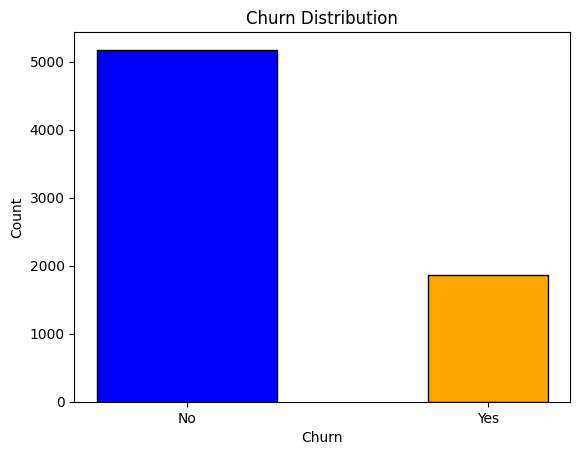

In [10]:


# Generating a bar plot using matplotlib
churn_counts = data['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orange'], width = [0.6, 0.4], edgecolor = 'black')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


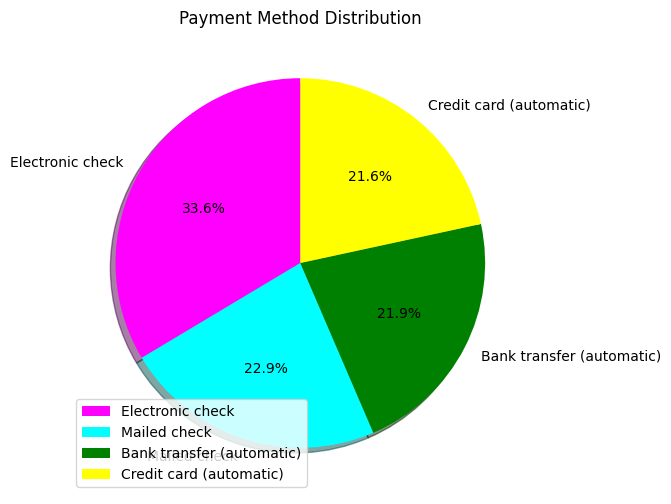

In [11]:
import matplotlib.pyplot as plt

# Calculate payment method counts
payment_counts = data['PaymentMethod'].value_counts()

# Define colors
colors = ['magenta', 'cyan', 'green', 'yellow']

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Payment Method Distribution')
plt.legend()
plt.show()


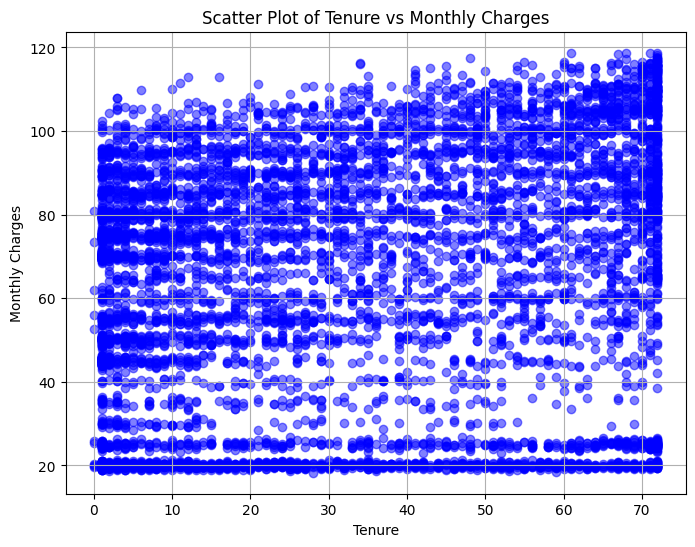

In [12]:

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()




# Performing Machine Learning models

Logistic Regression

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' is your pandas DataFrame containing the dataset
# Let's say you want to predict 'Churn' based on other features

# Define features (X) and target variable (y)
X = data[['tenure', 'MonthlyCharges', 'SeniorCitizen']]  # Example features
y = data['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409

Confusion Matrix:
[[956  80]
 [194 179]]


Decision Tree Classifier

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' is your pandas DataFrame containing the dataset
# Let's say you want to predict 'Churn' based on other features

# Define features (X) and target variable (y)
X = data[['tenure', 'MonthlyCharges', 'SeniorCitizen']]  # Example features
y = data['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.49      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
[[846 190]
 [189 184]]
